In [1]:
import glob
import os
import sys
sys.path.append("..\\")

import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from src.data_handling import data_loading, data_visualize
from src.models.convnet_model import ConvnetModel

d:\Users\Kajetan\anaconda3\envs\inzok\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data loading

In [2]:
train_val_data = data_loading.load_data("..\\data\\train")
test_data = data_loading.load_data("..\\data\\val")

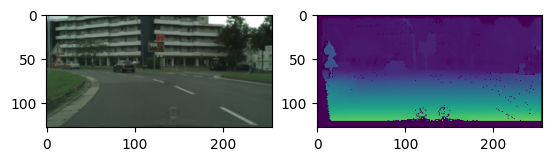

In [3]:
data_visualize.visualize_image_depth(train_val_data["img"][0], train_val_data["depth"][0])

## Training

In [4]:
model = ConvnetModel()

model.train(
    np.array(train_val_data["img"]),
    np.array(train_val_data["depth"]),
    n_epochs=15,
    lr=0.0001,
)

c:\Users\Kajetan\Documents\Programowanie\Magister\ROB\MonocularDepthEstimation\notebooks\..\src\models\convnet_model.py:185: FutureWarning: `nn.init.xavier_normal` is now deprecated in favor of `nn.init.xavier_normal_`.
  init.xavier_normal(m.weight)
c:\Users\Kajetan\Documents\Programowanie\Magister\ROB\MonocularDepthEstimation\notebooks\..\src\models\convnet_model.py:186: FutureWarning: `nn.init.constant` is now deprecated in favor of `nn.init.constant_`.
  init.constant(m.bias, 0)
100%|██████████| 149/149 [01:42<00:00,  1.46it/s]


Epoch [1/15] - Train Loss: 0.1240 - Val Loss: 0.1233


100%|██████████| 149/149 [01:44<00:00,  1.42it/s]


Epoch [2/15] - Train Loss: 0.0892 - Val Loss: 0.0753


100%|██████████| 149/149 [01:47<00:00,  1.38it/s]


Epoch [3/15] - Train Loss: 0.0787 - Val Loss: 0.0795


100%|██████████| 149/149 [01:48<00:00,  1.37it/s]


Epoch [4/15] - Train Loss: 0.0834 - Val Loss: 0.0685


100%|██████████| 149/149 [01:49<00:00,  1.36it/s]


Epoch [5/15] - Train Loss: 0.0630 - Val Loss: 0.0568


100%|██████████| 149/149 [01:50<00:00,  1.35it/s]


Epoch [6/15] - Train Loss: 0.0526 - Val Loss: 0.0487


100%|██████████| 149/149 [01:50<00:00,  1.35it/s]


Epoch [7/15] - Train Loss: 0.0536 - Val Loss: 0.0476


100%|██████████| 149/149 [01:50<00:00,  1.35it/s]


Epoch [8/15] - Train Loss: 0.0502 - Val Loss: 0.0497


100%|██████████| 149/149 [01:50<00:00,  1.35it/s]


Epoch [9/15] - Train Loss: 0.0474 - Val Loss: 0.0483


100%|██████████| 149/149 [01:50<00:00,  1.34it/s]


Epoch [10/15] - Train Loss: 0.0472 - Val Loss: 0.0462


100%|██████████| 149/149 [01:50<00:00,  1.34it/s]


Epoch [11/15] - Train Loss: 0.0452 - Val Loss: 0.0437


100%|██████████| 149/149 [01:50<00:00,  1.35it/s]


Epoch [12/15] - Train Loss: 0.0466 - Val Loss: 0.0484


100%|██████████| 149/149 [01:50<00:00,  1.35it/s]


Epoch [13/15] - Train Loss: 0.0488 - Val Loss: 0.0430


100%|██████████| 149/149 [01:50<00:00,  1.35it/s]


Epoch [14/15] - Train Loss: 0.0466 - Val Loss: 0.0475


100%|██████████| 149/149 [01:50<00:00,  1.35it/s]


Epoch [15/15] - Train Loss: 0.0476 - Val Loss: 0.0423


In [7]:
np.transpose(train_val_data["img"][0][np.newaxis], (0, 3, 1, 2))

array([[[[0.68627451, 0.67058824, 0.49411765, ..., 0.17254902,
          0.1254902 , 0.1372549 ],
         [0.68235294, 0.6627451 , 0.50196078, ..., 0.17647059,
          0.15294118, 0.15686275],
         [0.67843137, 0.65882353, 0.50980392, ..., 0.23921569,
          0.18823529, 0.14117647],
         ...,
         [0.33333333, 0.33333333, 0.33333333, ..., 0.21568627,
          0.21568627, 0.21568627],
         [0.32941176, 0.32941176, 0.32941176, ..., 0.21568627,
          0.21568627, 0.21176471],
         [0.32156863, 0.32156863, 0.3254902 , ..., 0.21568627,
          0.21568627, 0.21176471]],

        [[0.80784314, 0.79607843, 0.61568627, ..., 0.22352941,
          0.17647059, 0.19215686],
         [0.8       , 0.79215686, 0.62352941, ..., 0.23137255,
          0.20392157, 0.21960784],
         [0.8       , 0.78823529, 0.63529412, ..., 0.30588235,
          0.24313725, 0.19215686],
         ...,
         [0.40392157, 0.40392157, 0.40392157, ..., 0.28235294,
          0.27843137, 0.2

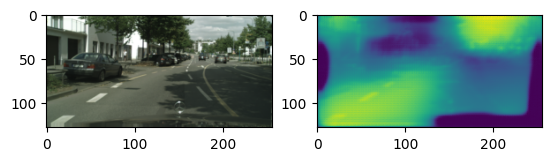

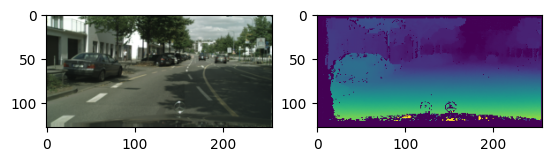

In [13]:
i = 180

x = torch.Tensor(np.transpose(test_data["img"][i][np.newaxis], (0, 3, 1, 2)))
x = x.to(device='cuda')
d = model._model(x).detach().cpu().numpy()[0]
d = np.transpose(d, (1, 2, 0))

data_visualize.visualize_image_depth(test_data["img"][i], d)
data_visualize.visualize_image_depth(test_data["img"][i], test_data["depth"][i])